# Synchronize homework files

In [3]:
! rm -rf sample_data; curl -s https://raw.githubusercontent.com/mposa/MEAM517/master/sync_hw.py > sync_hw.py
files = ["quadrotor.py", "stability_analysis.py", "create_animation.py", "quad_sim.py", "main"]

from sync_hw import sync_hw
sync_hw(6, files, True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install Drake and set up a server for the visualizer

In [2]:
# Install drake. We are using the lqr controller in drake as the final stabilizing controller.
# The installation process will take about 2 minutes but it's only required in the start of the Colab's virtual machine.
!curl -s https://raw.githubusercontent.com/mposa/MEAM517/master/colab_drake_setup.py > colab_drake_setup.py
from colab_drake_setup import setup
setup()

<IPython.core.display.Javascript object>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  205M  100  205M    0     0  24.3M      0  0:00:08  0:00:08 --:--:-- 28.7M
Reading package lists...
Building dependency tree...
Reading state information...
libglu1-mesa is already the newest version (9.0.0-2.1build1).
libglu1-mesa set to manually installed.
libjsoncpp1 is already the newest version (1.7.4-3).
libjsoncpp1 set to manually installed.
liblapack3 is already the newest version (3.7.1-4ubuntu1).
liblapack3 set to manually installed.
libogg0 is already the newest version (1.3.2-1).
libogg0 set to manually installed.
libtheora0 is already the newest version (1.1.1+dfsg.1-14).
libtheora0 set to manually installed.
libxt6 is already the newest version (1:1.1.5-1).
libxt6 set to manually installed.
python3-numpy is already the newest version (1:1.13.3-2ubuntu1).
python3-numpy set to manually installed.
zlib1g is already 

To generate S_sol.npy, please complete Problem 2 and run stability_analysis.py
[[0.         0.        ]
 [4.05357319 1.41551611]
 [3.98197601 1.57048328]
 ...
 [4.90433562 4.90491436]
 [4.90436842 4.90493249]
 [4.90440065 4.90495009]]


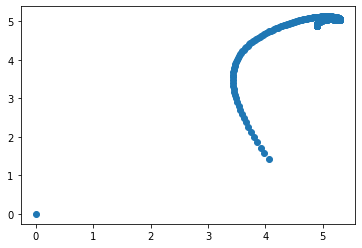

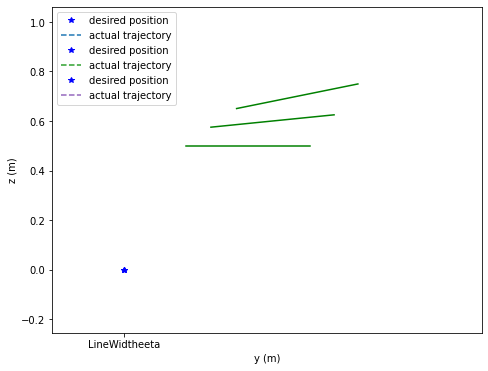

In [15]:
%matplotlib inline 

import numpy as np
from math import sin, cos, pi
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

# import matplotlib; matplotlib.use("TkAgg")

from quad_sim import simulate_quadrotor

# Need to reload the module to use the latest code
import quadrotor

importlib.reload(quadrotor)
from quadrotor import Quadrotor

"""
Load in the animation function
"""

import create_animation

importlib.reload(create_animation)
from create_animation import create_animation

# Weights of LQR cost
R = np.eye(2);
Q = np.diag([10, 10, 1, 1, 1, 1]);
Qf = Q;

# End time of the simulation
tf = 10;

# Construct our quadrotor controller
quadrotor = Quadrotor(Q, R, Qf);
x0 = np.array([0.5, 0.5, 0, 1, 1, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor)
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots(1,1)
ax1.scatter(u[:, 0], u[:, 1])
fig1.show()
print(u)

x2 = x + 0.1

x3 = x2 + 0.1

anim, fig2 = create_animation(np.stack((x, x2, x3), axis=0), tf, n_agents=3)

anim

In [7]:
%matplotlib

Using matplotlib backend: agg


# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

In [ ]:
%matplotlib inline

"""
Simulate quadrotor
"""

import numpy as np
from math import sin, cos, pi
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

from quad_sim import simulate_quadrotor

# Need to reload the module to use the latest code
import quadrotor
importlib.reload(quadrotor)
from quadrotor import Quadrotor

"""
Load in the animation function
"""
import create_animation
importlib.reload(create_animation)
from create_animation import create_animation

# Weights of LQR cost
R = np.eye(2);
Q = np.diag([10, 10, 1, 1, 1, 1]);
Qf = Q;

# End time of the simulation
tf = 10;

# Construct our quadrotor controller 
quadrotor = Quadrotor(Q, R, Qf);

## Simulate the quadrotor using MPC as the controller


In [ ]:
# Set quadrotor's initial state and simulate
x0 = np.array([0.5, 0.5, 0, 1, 1, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor)

anim, fig = create_animation(x, tf)
plt.close()
anim

## Simulate the quadrotor using LQR as the controller (Already implemented)

In [ ]:
# Set quadrotor's initial state and simulate
x0 = np.array([0.5, 0.5, 0, 1, 1, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor, False)

anim, fig = create_animation(x, tf)
plt.close()
anim

# Problem 2 - Stability Analysis using Sums of Squares

Start solving...
SolutionResult.kSolutionFound
S = [[ 1.41542298e+00 -1.00129241e-16 -1.30051147e+00  6.50166932e-01
   6.21091554e-17 -7.54252744e-02]
 [-1.00129241e-16  9.76336325e-01  2.43254854e-16 -9.12816061e-17
   2.15779644e-01  7.38714305e-18]
 [-1.30051147e+00  2.43254854e-16  7.70974561e+00 -1.87263159e+00
  -2.70919599e-17  4.63828787e-01]
 [ 6.50166932e-01 -9.12816061e-17 -1.87263159e+00  8.55016334e-01
   2.35619510e-17 -1.17200823e-01]
 [ 6.21091554e-17  2.15779644e-01 -2.70919599e-17  2.35619510e-17
   3.80788760e-01  1.77556283e-17]
 [-7.54252744e-02  7.38714305e-18  4.63828787e-01 -1.17200823e-01
   1.77556283e-17  1.58555123e-01]]


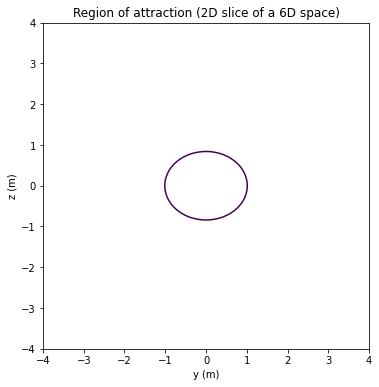

In [ ]:
# Need to reload the module to use the latest code
import stability_analysis
importlib.reload(stability_analysis)
from stability_analysis import *

S_sol = stability_analysis.compute_region_of_attraction(quadrotor)
np.save('S_sol', S_sol)
stability_analysis.visualize_region_of_attraction(S_sol)

# Problem 3 - Control Lyapunov Functions

## MPC with CLF

In [ ]:
# Set quadrotor's initial state and simulate
x0 = np.array([0.5, 0.5, 0, 1, 1, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor, True, True, False)

anim, fig = create_animation(x, tf)
plt.close()
anim

# QP with CLF

In [ ]:
# Set quadrotor's initial state and simulate using QP CLF as the controller
x0 = np.array([0.5, 0.5, 0, 0, 0, 0])
x, u, t = simulate_quadrotor(x0, tf, quadrotor, use_mpc=False, use_mpc_with_clf=False, use_clf_qp=True)

anim, fig = create_animation(x, tf)
plt.close()
anim

( - 0.042960726561611665 * u(0) + 0.25874037104720377 * u(1))
1.0583991562018293
( - 0.080316103921996951 * u(0) + 0.22138499368681847 * u(1))
0.7377556218859375
( - 0.11788316111362263 * u(0) + 0.18381793649519285 * u(1))
0.4106944325362577
( - 0.15566189813648865 * u(0) + 0.14603919947232682 * u(1))
0.07693371175221383
( - 0.19365231499059499 * u(0) + 0.10804878261822047 * u(1))
-0.26380841686676987
( - 0.20154367089865799 * u(0) + 0.04744772856183356 * u(1))
-0.5495824147057369
( - 0.16390878590196736 * u(0) - 0.047548625057057314 * u(1))
-0.7559921522500317
( - 0.10265417583615642 * u(0) - 0.14492669773435268 * u(1))
-0.8703612671977018
( - 0.14065492598024912 * u(0) - 0.13372248156726499 * u(1))
-1.0153808890200868
( - 0.14283198135686784 * u(0) - 0.15382412816016847 * u(1))
-1.1188994541141275
( - 0.15615788646041842 * u(0) - 0.16187026077813457 * u(1))
-1.226079024901258
( - 0.1653625499026018 * u(0) - 0.17269620410907438 * u(1))
-1.325530058529415
( - 0.17490233422268234 * u(0)